# Proyek Analisis Data: Nama dataset
- Nama: Afif Kisnandhya Putra
- Email: apipkisnandhyap45@gmail.com
- Id Dicoding: afifkisnandhya

## Menentukan Pertanyaan Bisnis

- pertanyaan 1 : Berdasarkan data PM2.5, PM10, dan CO di stasiun Gucheng, bagaimana tren polusi udara selama tiga tahun terakhir?
- pertanyaan 2 : Korelasi anatara PM2.5 dan CO selama tiga tahun terakhir?

## Menyaipkan semua library yang dibuthkan

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

In [15]:
df = pd.read_csv("https://raw.githubusercontent.com/Kajaxssss/projekdataa/main/PRSA_Data_Gucheng_20130301-20170228.csv")
df.head()

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    6.0  18.0  5.0  NaN  800.0  88.0   0.1   
1   2  2013      3    1     1    6.0  15.0  5.0  NaN  800.0  88.0  -0.3   
2   3  2013      3    1     2    5.0  18.0  NaN  NaN  700.0  52.0  -0.7   
3   4  2013      3    1     3    6.0  20.0  6.0  NaN    NaN   NaN  -1.0   
4   5  2013      3    1     4    5.0  17.0  5.0  NaN  600.0  73.0  -1.3   

     PRES  DEWP  RAIN   wd  WSPM  station  
0  1021.1 -18.6   0.0   NW   4.4  Gucheng  
1  1021.5 -19.0   0.0   NW   4.0  Gucheng  
2  1021.5 -19.8   0.0  WNW   4.6  Gucheng  
3  1022.7 -21.2   0.0    W   2.8  Gucheng  
4  1023.0 -21.4   0.0  WNW   3.6  Gucheng

### Gathering Data

### Assessing Data

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [49]:
df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64

In [50]:
df.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34418.000000  34683.000000  34557.000000  34396.000000  33663.000000   
mean      83.852089    118.861978     15.366162     55.871075   1323.974423   
std       82.796445     96.742626     21.204526     36.473860   1208.957772   
min        2.000000      2.000000      0.285600      2.000000    100.000000   
25%       24.000000     45.000000      2.000000     26.000000    600.000000   
50%       60.000000     99.000000      7.000000     50.000000    900.000000   
75%      115.750000    167.000000     20.000000     79.000000   1600.000000   
max      770.000000    994.000000    500.000000    276.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  34335.000000  35013.000000  35014.000000  35013.000000  35021.000000   
mean      57.694879     13.864524   1008.829592      2.610442      0.064453   
std       57.019587     11.292857     10.103256     13.782991      0.838654   
min        0.214200    -15.600000    984.000000    -34.600000      0.000000   
25%       10.000000      3.600000   1000.500000     -8.900000      0.000000   
50%       45.000000     14.800000   1008.500000      3.000000      0.000000   
75%       83.000000     23.500000   1017.000000     15.300000      0.000000   
max      450.000000     41.600000   1038.100000     27.400000     41.900000   

               WSPM  
count  35022.000000  
mean       1.343310  
std        1.151064  
min        0.000000  
25%        0.600000  
50%        1.000000  
75%        1.800000  
max       12.000000

In [23]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


### Cleaning Data

In [25]:
df.CO.value_counts()

CO
300.0     2632
600.0     2377
400.0     2328
700.0     2321
500.0     2272
          ... 
5299.0       1
9500.0       1
6099.0       1
6299.0       1
7800.0       1
Name: count, Length: 116, dtype: int64

In [47]:
df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64

In [27]:
df[df.CO == df.CO.max()]

No  year  month  day  hour  PM2.5   PM10   SO2    NO2       CO   O3  \
33388  33389  2016     12   21     4  432.0  432.0  12.0  140.0  10000.0  7.0   
33739  33740  2017      1    4    19  571.0  679.0  15.0  270.0  10000.0  3.0   
33744  33745  2017      1    5     0  415.0  451.0  12.0  168.0  10000.0  3.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM  station  
33388  -1.4  1019.9  -3.3   0.0  NNE   0.8  Gucheng  
33739   1.0  1018.7  -4.6   0.0    S   0.8  Gucheng  
33744  -1.7  1021.3  -3.4   0.0  NNE   2.1  Gucheng

In [78]:
df.CO.replace(df.CO.max(), 5000, inplace=True)

In [77]:
df[df.CO == df.CO.max()]

No  year  month  day  hour  PM2.5   PM10    SO2    NO2      CO  \
7704    7705  2014      1   16     0  585.0  630.0  182.0  195.0  8300.0   
7706    7707  2014      1   16     2  610.0  634.0  126.0  184.0  8300.0   
24130  24131  2015     12    1    10  661.0  661.0   46.0  163.0  8300.0   
24709  24710  2015     12   25    13  680.0  680.0   13.0  155.0  8300.0   
24722  24723  2015     12   26     2  550.0  600.0    8.0  141.0  8300.0   
33398  33399  2016     12   21    14  469.0  502.0   14.0  205.0  8300.0   
33407  33408  2016     12   21    23  443.0  443.0   23.0  207.0  8300.0   

         O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  station  
7704   29.0  -2.1  1019.1  -9.9   0.0  NNE   1.1  Gucheng  
7706   27.0  -2.1  1019.3 -11.4   0.0  ESE   1.0  Gucheng  
24130   2.0   1.1  1012.1  -1.5   0.0    S   1.1  Gucheng  
24709   7.0  -1.5  1008.8  -4.5   0.0  WSW   1.8  Gucheng  
24722   2.0  -3.7  1009.2  -4.7   0.0  ENE   0.8  Gucheng  
33398  11.0   4.4  1015.5  -2.5   0.0   NE   0.6  Gucheng  
33407   5.0   2.3  1016.0  -3.0   0.0  NNW   0.4  Gucheng

In [73]:
df.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34418.000000  34683.000000  34557.000000  34396.000000  33663.000000   
mean      83.852089    118.861978     15.366162     55.871075   1304.965719   
std       82.796445     96.742626     21.204526     36.473860   1149.045981   
min        2.000000      2.000000      0.285600      2.000000     10.000000   
25%       24.000000     45.000000      2.000000     26.000000    600.000000   
50%       60.000000     99.000000      7.000000     50.000000    900.000000   
75%      115.750000    167.000000     20.000000     79.000000   1600.000000   
max      770.000000    994.000000    500.000000    276.000000   8500.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  34335.000000  35013.000000  35014.000000  35013.000000  35021.000000   
mean      57.694879     13.864524   1008.829592      2.610442      0.064453   
std       57.019587     11.292857     10.103256     13.782991      0.838654   
min        0.214200    -15.600000    984.000000    -34.600000      0.000000   
25%       10.000000      3.600000   1000.500000     -8.900000      0.000000   
50%       45.000000     14.800000   1008.500000      3.000000      0.000000   
75%       83.000000     23.500000   1017.000000     15.300000      0.000000   
max      450.000000     41.600000   1038.100000     27.400000     41.900000   

               WSPM  
count  35022.000000  
mean       1.343310  
std        1.151064  
min        0.000000  
25%        0.600000  
50%        1.000000  
75%        1.800000  
max       12.000000

In [18]:
def find_iqr(x):
  return np.subtract(*np.percentile(x, [75, 25]))

In [19]:
df[['CO', 'PM2.5', 'PM10', ]].apply(find_iqr)

CO      NaN
PM2.5   NaN
PM10    NaN
dtype: float64

In [48]:
df.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34418.000000  34683.000000  34557.000000  34396.000000  33663.000000   
mean      83.852089    118.861978     15.366162     55.871075   1314.717969   
std       82.796445     96.742626     21.204526     36.473860   1176.069292   
min        2.000000      2.000000      0.285600      2.000000     30.000000   
25%       24.000000     45.000000      2.000000     26.000000    600.000000   
50%       60.000000     99.000000      7.000000     50.000000    900.000000   
75%      115.750000    167.000000     20.000000     79.000000   1600.000000   
max      770.000000    994.000000    500.000000    276.000000   9400.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  34335.000000  35013.000000  35014.000000  35013.000000  35021.000000   
mean      57.694879     13.864524   1008.829592      2.610442      0.064453   
std       57.019587     11.292857     10.103256     13.782991      0.838654   
min        0.214200    -15.600000    984.000000    -34.600000      0.000000   
25%       10.000000      3.600000   1000.500000     -8.900000      0.000000   
50%       45.000000     14.800000   1008.500000      3.000000      0.000000   
75%       83.000000     23.500000   1017.000000     15.300000      0.000000   
max      450.000000     41.600000   1038.100000     27.400000     41.900000   

               WSPM  
count  35022.000000  
mean       1.343310  
std        1.151064  
min        0.000000  
25%        0.600000  
50%        1.000000  
75%        1.800000  
max       12.000000

## Exploratory Data Analysis (EDA)

### Explore ...

In [82]:
df['year'].unique()

array([2013, 2014, 2015, 2016, 2017], dtype=int64)

In [90]:
df.describe(include="all")

No          year         month           day          hour  \
count   35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    17532.500000   2014.662560      6.522930     15.729637     11.500000   
std     10122.249256      1.177213      3.448752      8.800218      6.922285   
min         1.000000   2013.000000      1.000000      1.000000      0.000000   
25%      8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%     17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%     26298.250000   2016.000000     10.000000     23.000000     17.250000   
max     35064.000000   2017.000000     12.000000     31.000000     23.000000   

               PM2.5          PM10           SO2           NO2            CO  \
count   34418.000000  34683.000000  34557.000000  34396.000000  33663.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       83.852089    118.861978     15.366162     55.871075   1323.974423   
std        82.796445     96.742626     21.204526     36.473860   1208.957772   
min         2.000000      2.000000      0.285600      2.000000    100.000000   
25%        24.000000     45.000000      2.000000     26.000000    600.000000   
50%        60.000000     99.000000      7.000000     50.000000    900.000000   
75%       115.750000    167.000000     20.000000     79.000000   1600.000000   
max       770.000000    994.000000    500.000000    276.000000  10000.000000   

                  O3          TEMP          PRES          DEWP          RAIN  \
count   34335.000000  35013.000000  35014.000000  35013.000000  35021.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       57.694879     13.864524   1008.829592      2.610442      0.064453   
std        57.019587     11.292857     10.103256     13.782991      0.838654   
min         0.214200    -15.600000    984.000000    -34.600000      0.000000   
25%        10.000000      3.600000   1000.500000     -8.900000      0.000000   
50%        45.000000     14.800000   1008.500000      3.000000      0.000000   
75%        83.000000     23.500000   1017.000000     15.300000      0.000000   
max       450.000000     41.600000   1038.100000     27.400000     41.900000   

           wd          WSPM  station  
count   34905  35022.000000    35064  
unique     16           NaN        1  
top         N           NaN  Gucheng  
freq     3949           NaN    35064  
mean      NaN      1.343310      NaN  
std       NaN      1.151064      NaN  
min       NaN      0.000000      NaN  
25%       NaN      0.600000      NaN  
50%       NaN      1.000000      NaN  
75%       NaN      1.800000      NaN  
max       NaN     12.000000      NaN

## Visualization & Explanatory Analysis

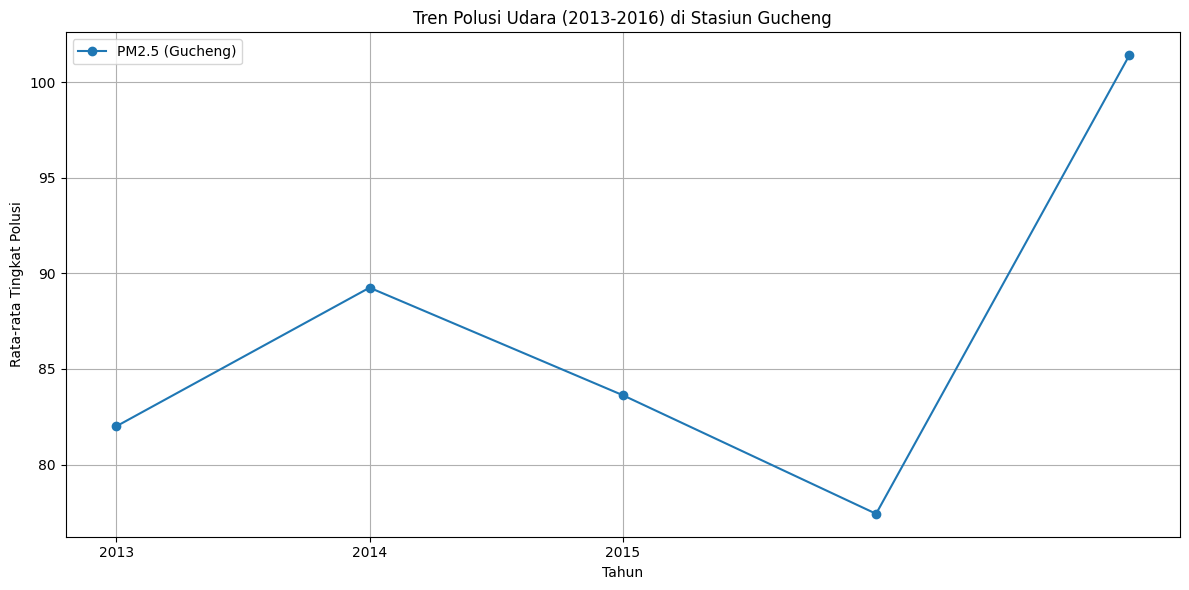

In [91]:


grouped = df.groupby(['year', 'station'])[['PM2.5', 'PM10', 'CO']].mean().reset_index()

plt.figure(figsize=(12, 6))
for station in ['Gucheng']:
    station_data = grouped[grouped['station'] == station]
    plt.plot(station_data['year'], station_data['PM2.5'], label=f'PM2.5 ({station})', marker='o')

plt.title('Tren Polusi Udara (2013-2016) di Stasiun Gucheng')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Tingkat Polusi')
plt.xticks(range(2013, 2016))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
     


### Pertanyaan 1 :  Berdasarkan data PM2.5, PM10, dan CO di stasiun Gucheng, bagaimana tren polusi udara selama tiga tahun terakhir?
Terdapat tren yang berfluktuasi dari tahun ke tahun dengan peningkatan yang signifikan pada tahun 2013 dan 2016.

### Pertanyaan 2: Korelasi anatara PM2.5 dan CO selama tiga tahun terakhir?

In [92]:
x = df["PM2.5"]
y = df["CO"]

In [94]:
x.describe()

count    34418.000000
mean        83.852089
std         82.796445
min          2.000000
25%         24.000000
50%         60.000000
75%        115.750000
max        770.000000
Name: PM2.5, dtype: float64

In [95]:
y.describe()

count    33663.000000
mean      1323.974423
std       1208.957772
min        100.000000
25%        600.000000
50%        900.000000
75%       1600.000000
max      10000.000000
Name: CO, dtype: float64

array([[nan, nan],
       [nan, nan]])

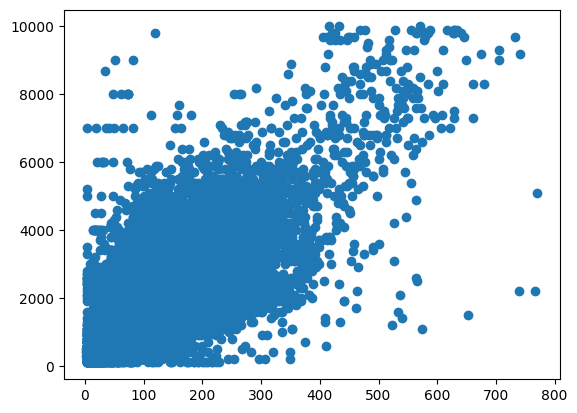

In [96]:
plt.scatter(x, y)
plt.show
np.corrcoef(x, y)

NILAI POSITIF

## Conclusion : 
Conclution pertanyaan 1 : Berdasarkan data PM2.5, PM10, dan CO di stasiun Gucheng, bagaimana tren polusi udara selama tiga tahun terakhir?
- Dari analisis di atas, Gucheng cenderung memiliki kualitas udara yang buruk berdasarkan rata-rata kadar PM2.5, PM10, dan CO selama tiga tahun terakhir.  BMKG membagi level polusi udara PM2.5 menjadi beberapa kategori yaitu:
Baik: 0 - 15,5 µg/m3
Sedang: 15,6 - 55,4 µg/m3
Tidak sehat: 55,5 - 150,4 µg/m3
Sangat tidak sehat: 150,5 - 250,4 µg/m3
Berbahaya: >250,5 µg/m3
- conclution pertanyaan 2 : Korelasi anatara PM2.5 dan CO selama tiga tahun terakhir? berdasarkan nilai korelasi tersebut dapat disimpulkan bahwa hubungan antara parameter pm2.5 dan co dengan tingkat pencemaran PM2.5 selama tiga tahun terakhir sangat lemah. aktor-faktor lain mungkin memiliki pengaruh yang lebih besar terhadap tingkat polusi PM2.5, atau mungkin ada faktor non-linier atau faktor eksternal yang tidak tercakup dalam analisis korelasi ini yang mempengaruhi polusi PM2.5. Oleh karena itu, analisis lebih lanjut mungkin diperlukan untuk lebih memahami faktor-faktor yang mempengaruhi tingkat polusi PM2.5.

In [206]:
df.to_csv("main_data.csv")